In [12]:
import pickle
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Import custom project code
import sys
sys.path.append("/home/b1044271/Columbia/Aperiodic_sleep/helpers")
from utils import calculate_bic, equalize_trials


## Load iEEG model parameters dataframe


In [7]:
save_path = '/home/b1044271/Columbia/Results/2025/iEEG_results.pkl'

with open(save_path, 'rb') as f:
    loaded_data = pickle.load(f)
    PSDs_W = loaded_data['PSDs']['Wakefulness']
    PSDs_N2 = loaded_data['PSDs']['N2']
    PSDs_N3 = loaded_data['PSDs']['N3']
    PSDs_R = loaded_data['PSDs']['REM']
    param_data = loaded_data['param_data']


## Extract error terms


In [8]:
W_EN = param_data["Wakefulness"]["EN"]
W_EK = param_data["Wakefulness"]["EK"]
N2_EN = param_data["N2"]["EN"]
N2_EK = param_data["N2"]["EK"]
N3_EN = param_data["N3"]["EN"]
N3_EK = param_data["N3"]["EK"]
R_EN = param_data["REM"]["EN"]
R_EK = param_data["REM"]["EK"]

## Extract Peak terms

In [9]:
W_PN = param_data["Wakefulness"]["PN"]
W_PK = param_data["Wakefulness"]["PK"]
N2_PN = param_data["N2"]["PN"]
N2_PK = param_data["N2"]["PK"]
N3_PN = param_data["N3"]["PN"]
N3_PK = param_data["N3"]["PK"]
R_PN = param_data["REM"]["PN"]
R_PK = param_data["REM"]["PK"]

## EMPTY VECTORS


In [10]:
BIC_NK_W = np.zeros(len(W_EN)) * np.nan
BIC_K_W = np.zeros(len(W_EK)) * np.nan
BIC_NK_N2 = np.zeros(len(N2_EN)) * np.nan
BIC_K_N2 = np.zeros(len(N2_EK)) * np.nan
BIC_NK_N3 = np.zeros(len(N3_EN)) * np.nan
BIC_K_N3 = np.zeros(len(N3_EK)) * np.nan
BIC_NK_R = np.zeros(len(R_EN)) * np.nan
BIC_K_R = np.zeros(len(R_EK)) * np.nan

## Calculate BIC

In [13]:
for i in np.arange(len(W_EN)):
    # equalize trials for conditions for both peak and error
    Wnx, Wkx, Wnxp, Wkxp = equalize_trials(W_EN[i][~np.isnan(W_EN[i])]**2, W_EK[i][~np.isnan(W_EK[i])]**2, W_PN[i][~np.isnan(W_PN[i])], W_PK[i][~np.isnan(W_PK[i])])
    N2nx, N2kx, N2nxp, N2kxp = equalize_trials(N2_EN[i][~np.isnan(N2_EN[i])]**2, N2_EK[i][~np.isnan(N2_EK[i])]**2, N2_PN[i][~np.isnan(N2_PN[i])], N2_PK[i][~np.isnan(N2_PK[i])])
    N3nx, N3kx, N3nxp, N3kxp = equalize_trials(N3_EN[i][~np.isnan(N3_EN[i])]**2, N3_EK[i][~np.isnan(N3_EK[i])]**2, N3_PN[i][~np.isnan(N3_PN[i])], N3_PK[i][~np.isnan(N3_PK[i])])
    Rnx, Rkx, Rnxp, Rkxp = equalize_trials(R_EN[i][~np.isnan(R_EN[i])]**2, R_EK[i][~np.isnan(R_EK[i])]**2, R_PN[i][~np.isnan(R_PN[i])], R_PK[i][~np.isnan(R_PK[i])])
    
    
    BIC_NK_W[i] = np.nanmean(calculate_bic(len(Wnx), Wnx, Wnxp*3+2))
    BIC_K_W[i] = np.nanmean(calculate_bic(len(Wkx), Wkx, Wkxp*3+3))
    
    BIC_NK_N2[i] = np.nanmean(calculate_bic(len(N2nx), N2nx, N2nxp*3+2))
    BIC_K_N2[i] = np.nanmean(calculate_bic(len(N2kx), N2kx, N2kxp*3+3))
    
    BIC_NK_N3[i] = np.nanmean(calculate_bic(len(N3nx), N3nx, N3nxp*3+2))
    BIC_K_N3[i] = np.nanmean(calculate_bic(len(N3kx), N3kx, N3kxp*3+2))
    
    BIC_NK_R[i] = np.nanmean(calculate_bic(len(Rnx), Rnx, Rnxp*3+2))
    BIC_K_R[i] = np.nanmean(calculate_bic(len(Rkx), Rkx, Rkxp*3+2))
    
    Wnx, Wkx, N2nx, N2kx, N3nx, N3kx, Rnx, Rkx = [], [], [], [], [], [], [], []
    Wnxp, Wkxp, N2nxp, N2kxp, N3nxp, N3kxp, Rnxp, Rkxp = [], [], [], [], [], [], [], []

In [14]:
NK_BIC = np.reshape([BIC_NK_W,BIC_NK_N2,BIC_NK_N3,BIC_NK_R],((38*4)))
K_BIC  = np.reshape([BIC_K_W,BIC_K_N2,BIC_K_N3,BIC_K_R],((38*4)))

data = {'BIC_K_NK' : np.reshape([K_BIC, NK_BIC],(38*8)),
       'X' : np.repeat(["knee","fixed"], 38*4,axis=0),
       'Stages' : np.repeat(['Wake','N2','N3','REM','Wake','N2','N3','REM'], 38, axis=0)}

df = pd.DataFrame(data)

array_list_BIC = [K_BIC, NK_BIC]

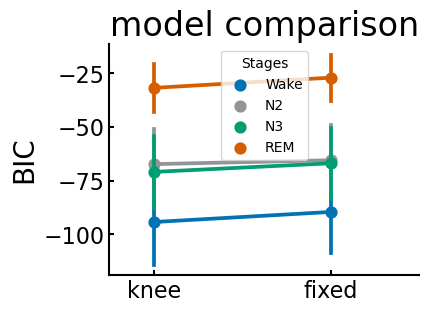

In [19]:
#titles = ['Knee M', 'Fixed M']
ColStage = [sns.color_palette("colorblind")[0], 
            sns.color_palette("colorblind")[7], 
        sns.color_palette("colorblind")[2],sns.color_palette("colorblind")[3]]


ax = plt.figure(figsize=(4,3))  

ax = sns.pointplot(data=df, x='X', y="BIC_K_NK", hue = 'Stages', palette = ColStage)
ax.set( ylabel='Knee frequency (Hz)')
#ax.set_xticklabels(titles)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel('BIC',fontsize=20)
plt.xlabel('')
plt.xlim(-0.25,1.5)
plt.title('model comparison', fontsize = 24)
#sns.scatterplot(x=[0,1], y=[np.mean(K_BIC), np.mean(NK_BIC)], marker='X', color='black', s=200, zorder=4, legend=False)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

plt.savefig("/home/b1044271/Columbia/Plots/NOV24/iEEG_ModelComparison_av.svg", dpi = 600 )


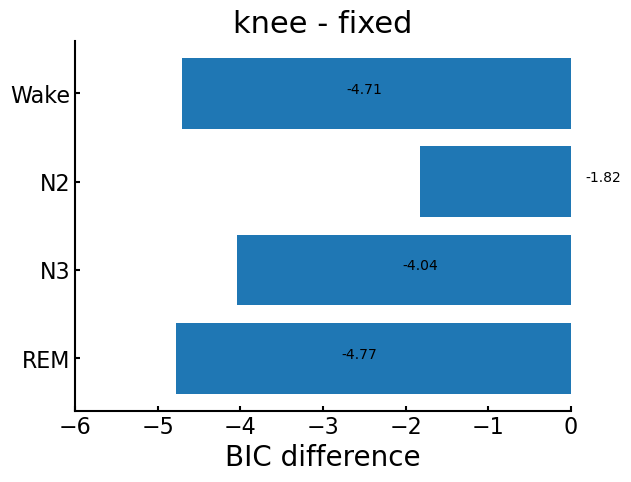

In [17]:
# Fixing random state for reproducibility
fig, ax = plt.subplots()

diff = [np.nanmean(BIC_K_W)-np.nanmean(BIC_NK_W),
 np.nanmean(BIC_K_N2)-np.nanmean(BIC_NK_N2),np.nanmean(BIC_K_N3)-np.nanmean(BIC_NK_N3),np.nanmean(BIC_K_R)-np.nanmean(BIC_NK_R)]
# Example data
Stages = ('Wake', 'N2', 'N3', 'REM')
y_pos = np.arange(len(Stages))

ax.barh(y_pos, diff, align='center')
ax.set_yticks(y_pos, labels=Stages)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('BIC difference', fontsize = 20)
ax.set_title('knee - fixed', fontsize = 22)

for index, value in enumerate(diff):
    plt.text(value +2, index,
             str(np.round(value,2)))

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
plt.xlim()

plt.savefig("/home/b1044271/Columbia/Plots/NOV24/iEEG_ModelComparison_bar.svg", dpi = 600 )